In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('data/yellow_tripdata_2022-01.parquet')

In [3]:
len(df.columns)

19

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [6]:
np.std(df.duration.dt.total_seconds())/60

46.44529571272532

In [7]:
type(df.duration.iloc[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [8]:
df['duration'] = df['duration'].apply(lambda x: x.total_seconds()/60)

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


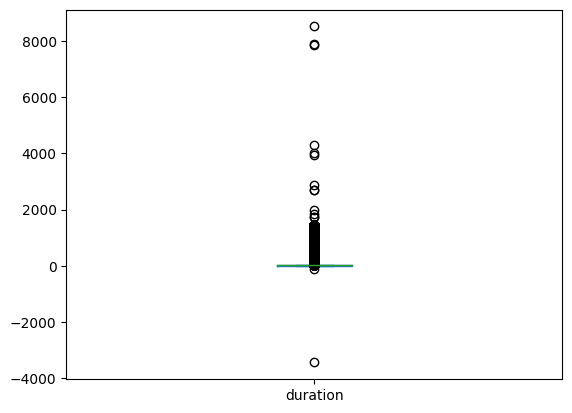

In [10]:
import matplotlib.pyplot as plt

df['duration'].plot.box()
plt.show()

In [11]:
df['duration'].describe(percentiles=[.95,.98,.99])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
50%      1.018333e+01
95%      3.193333e+01
98%      4.215000e+01
99%      5.085000e+01
max      8.513183e+03
Name: duration, dtype: float64

In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

In [14]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [15]:
df[categorical] = df[categorical].astype(str)

In [16]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [17]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [18]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [19]:
X_train

<2421440x516 sparse matrix of type '<class 'numpy.float64'>'
	with 7264320 stored elements in Compressed Sparse Row format>

In [20]:
target = 'duration'
y_train = df[target].values
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_train)

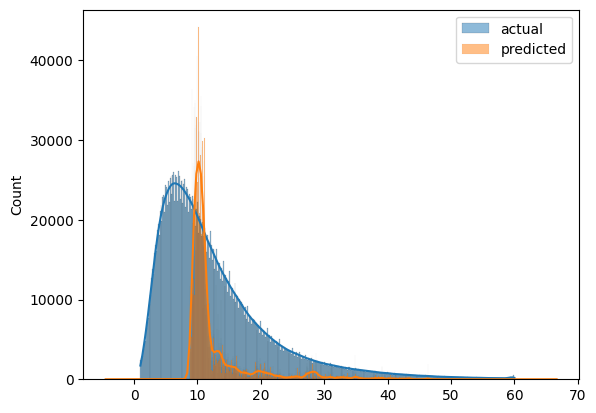

In [23]:
import seaborn as sns
sns.histplot(y_train,kde=True, label='actual')
sns.histplot(y_pred, kde=True, label='predicted')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_train, y_pred=y_pred, squared=False)

7.001496179409282

In [31]:
df_val = pd.read_parquet('data/yellow_tripdata_2022-02.parquet')


In [32]:
df_val['duration'] = df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']
df_val['duration'] = df_val['duration'].apply(lambda x: x.total_seconds()/60)


In [33]:
df_val = df_val[((df_val.duration >= 1) & (df_val.duration <= 60))]

In [34]:
len(df), len(df_val)

(2421440, 2918187)

In [36]:
df_val[categorical] = df_val[categorical].astype(str)
train_dicts_val = df_val[categorical + numerical].to_dict(orient='records')
dv_val = DictVectorizer()
X_train_val = dv_val.fit_transform(train_dicts_val)

target = 'duration'
y_train_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train_val, y_train_val)
y_pred_val = lr.predict(X_train_val)

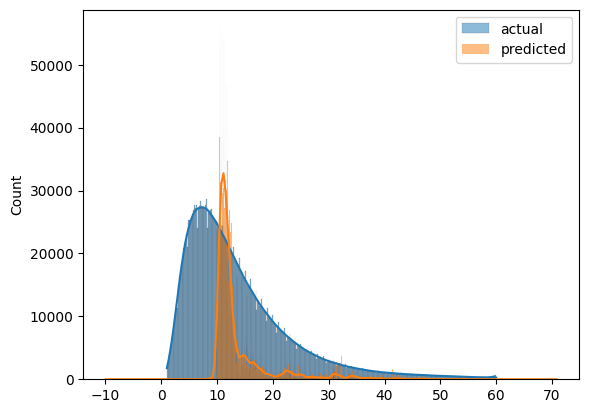

In [37]:
import seaborn as sns
sns.histplot(y_train_val,kde=True, label='actual')
sns.histplot(y_pred_val, kde=True, label='predicted')
plt.legend()
plt.show()

In [38]:
mean_squared_error(y_true=y_train_val, y_pred=y_pred_val, squared=False)

7.65762387855175